In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from itables import show
import numpy as np

from result_stats import ResultStats

df = pd.read_csv("data/wjpc_2024_individual_final.csv", 
                 index_col=0
                )

df = df.rename(columns={"#": "Place"})
df = df.set_index('Place')
df = df[['Name', 'Time', 'Country', 'Origin']]
res = ResultStats(df)

In [3]:
n_participants = res.df["Country"].value_counts()

In [4]:
# Gradient functions from https://medium.com/@BrendanArtley/matplotlib-color-gradients-21374910584b
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

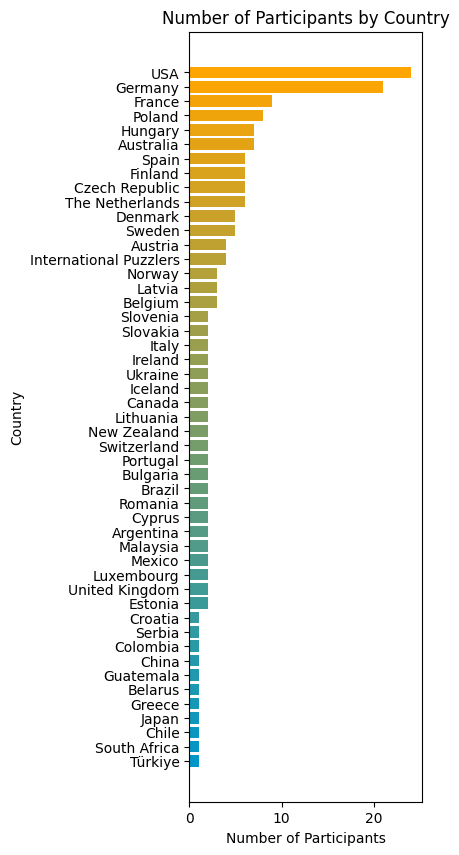

In [5]:
import matplotlib.pyplot as plt

n_participants = res.df["Country"].value_counts()

def get_graph(n_participants):
    fig, ax = plt.subplots(figsize=(3, 10))
    left = '#0096C7'
    right = '#FFA500'
    n_participants = n_participants.sort_values(ascending=True)
    ax.set_ylabel('Country')
    ax.set_xlabel('Number of Participants')
    ax.set_title('Number of Participants by Country')
    ax = ax.barh(n_participants.index, n_participants.values,
             color=get_color_gradient(left, right, len(n_participants)))
    return ax
ax = get_graph(n_participants)


<Axes: >

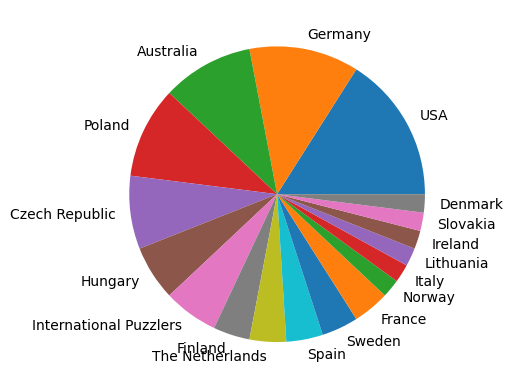

In [9]:
res.df[:50]['Country'].value_counts().plot(kind='pie', ylabel="")

<Axes: >

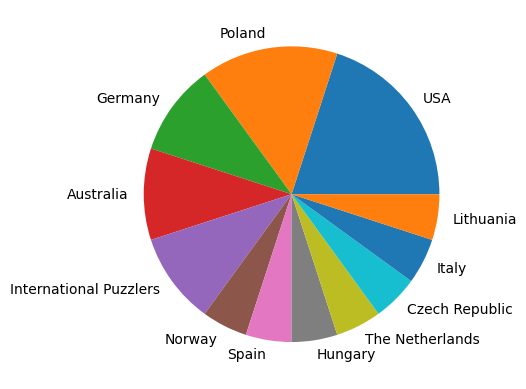

In [11]:
res.df[:20]['Country'].value_counts().plot(kind='pie', ylabel="")

In [14]:
country_res = {}
for place, row in res.df[:50].iterrows():
    temp = country_res.get(row["Country"], [])
    temp.append(place)
    country_res[row["Country"]] = temp
    
country_res

{'Norway': [1],
 'Poland': [2, 3, 20, 44, 49],
 'USA': [4, 15, 17, 19, 22, 24, 28, 41],
 'Germany': [5, 12, 23, 36, 42, 50],
 'Hungary': [6, 26, 34],
 'Spain': [7, 31],
 'Australia': [7, 14, 29, 39, 46],
 'The Netherlands': [9, 38],
 'Czech Republic': [10, 21, 32, 47],
 'Italy': [11],
 'International Puzzlers': [13, 18, 40],
 'Lithuania': [16],
 'France': [25, 45],
 'Finland': [27, 35],
 'Sweden': [30, 37],
 'Ireland': [33],
 'Slovakia': [43],
 'Denmark': [48]}

In [17]:
d = res.df['Country'].value_counts()
n = res.df[:50]['Country'].value_counts()

{'USA': 0.3333333333333333,
 'Germany': 0.2857142857142857,
 'Australia': 0.7142857142857143,
 'Poland': 0.625,
 'Czech Republic': 0.6666666666666666,
 'Hungary': 0.42857142857142855,
 'International Puzzlers': 0.75,
 'Finland': 0.3333333333333333,
 'The Netherlands': 0.3333333333333333,
 'Spain': 0.3333333333333333,
 'Sweden': 0.4,
 'France': 0.2222222222222222,
 'Norway': 0.3333333333333333,
 'Italy': 0.5,
 'Lithuania': 0.5,
 'Ireland': 0.5,
 'Slovakia': 0.5,
 'Denmark': 0.2}